---
# 동남아 여행지 트랜드 분석
### 최근 동남아 지역 여행지에 대한 여행사와 소비자들 간의 트랜드 비교
--- 

In [3]:
# 모듈 임포트
import requests
from bs4 import BeautifulSoup
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
from selenium import webdriver
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Image  
import numpy as np
import platform

In [2]:
def pkgtourToCsv():
    name_list = [] # 패키지 명을 저장할 리스트
    url_list = [] # 주소를 저장할 리스트

    for page in range(1, 28):
        html = requests.get(f'https://pkgtour.naver.com/list?destination=ASIA_10007&departureDate=2022.07.29.%2C2022.08.29.&bookStatusCodes=LEVDC&adultCnt=1&page={page}') # 각 페이지의 html을 읽어오고
        soup = BeautifulSoup(html.text, 'html.parser') # BeautifulSoup를 활용해 html 데이터를 사용하기 쉽게 변형
        ul = soup.find('ul', {'class':'list'}) # soup 데이터에서 <ul> 태그의 'list'에 해당하는 class를 저장
        names = ul.find_all('b', {'class':'name'}) # <ul>에서 class가 name인 'b' 태그 검색
        urls = ul.find_all('a', {'class':'anchor'}) # <ul>에서 class가 anchor인 'a' 태그 검색
        for index in range(len(names)): # 전체 리스트에서
            name_list.append(names[index].text) # 각각의 names를 name_list로 저장
            url_list.append('https://pkgtour.naver.com'+ urls[index]['href']) # 각각의 url을 url list로 저장
            
    df = pd.DataFrame([name_list, url_list]).T # name_list와 url_list를 df 으로 형성
    df.columns = ['패키지명', '패키지 주소']  # 컬럼명 저장해주고
    df.to_csv("./Data/pkgtour_SEA.csv", encoding='utf-8', index=False) # df을 csv파일로 저장

In [3]:
#pkgtourToCsv()

In [1]:
okt = Okt()

NameError: name 'Okt' is not defined

In [5]:
def showWordCloud(tags) :
    # 폰트 설정
    if platform.system() == 'Windows': 
        path = r'c:\Windows\Fonts\malgun.ttf'
    elif platform.system() == 'Darwin': # Mac OS
        path = r'/System/Library/Fonts/AppleGothic'
    else:
        path = r'/usr/share/fonts/truetype/name/NanumMyeongjo.ttf'

    # wordcloud 생성

    wc = WordCloud(font_path=path, background_color="white", max_font_size=60, random_state = 52, colormap = 'winter_r')
    cloud = wc.generate_from_frequencies(dict(tags))

    plt.figure(figsize=(18, 14))
    plt.axis('off')
    plt.imshow(cloud)
    plt.show()

#### 동남아에서 어느 여행지가 트랜드일까?

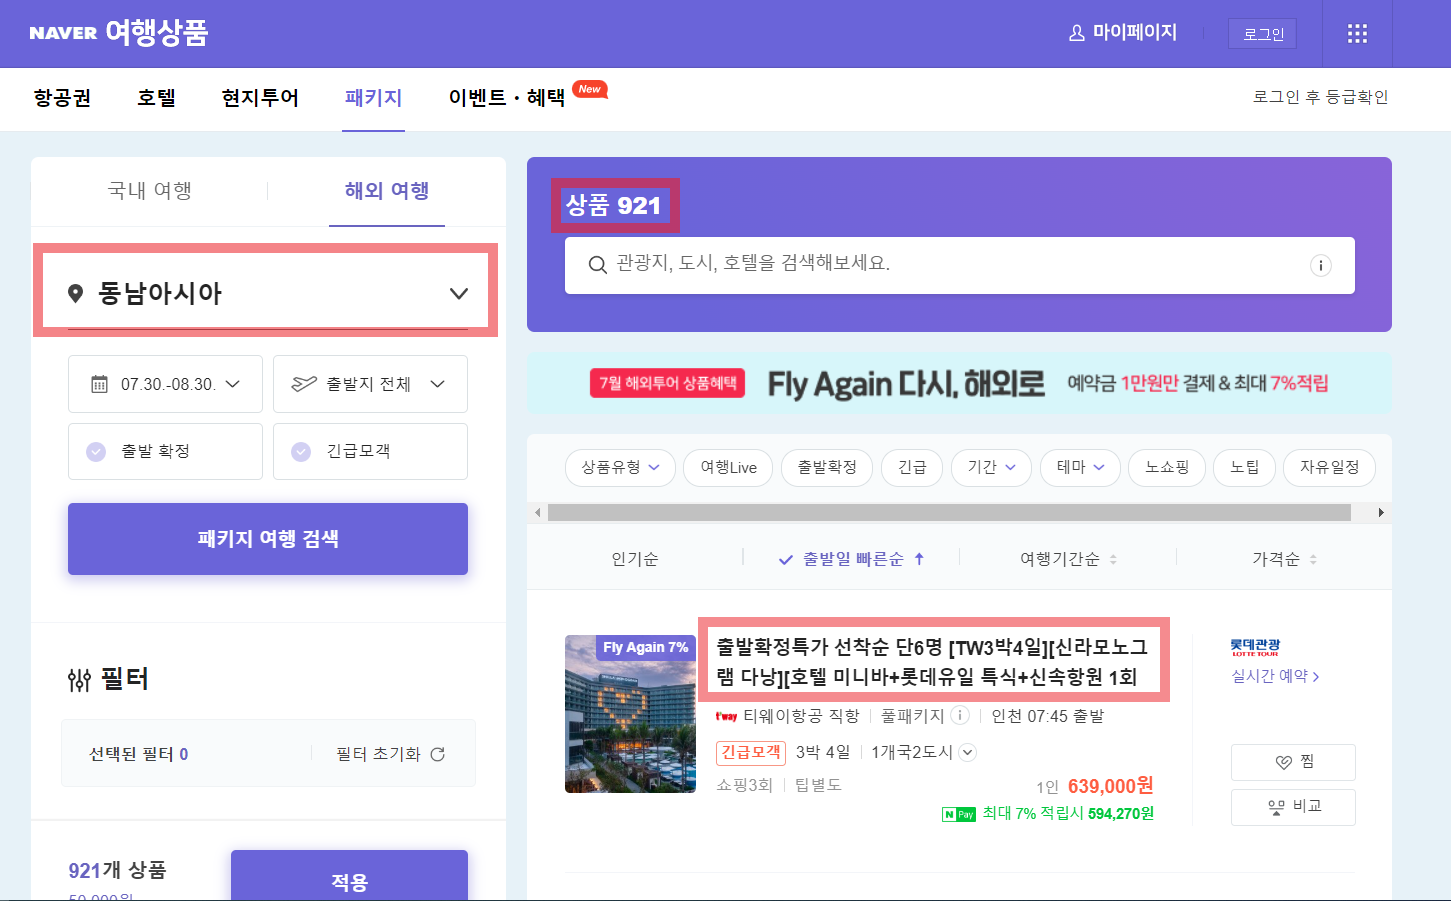

In [6]:
Image('./image/img_01.PNG')

### 네이버 여행사 홈페이지에서 동남아 여행지에 대한 패키지 상품 크롤링
### => 크롤링한 패키지명과 주소를 csv 파일로 저장

###### 패키지명에 대한 워드클라우드

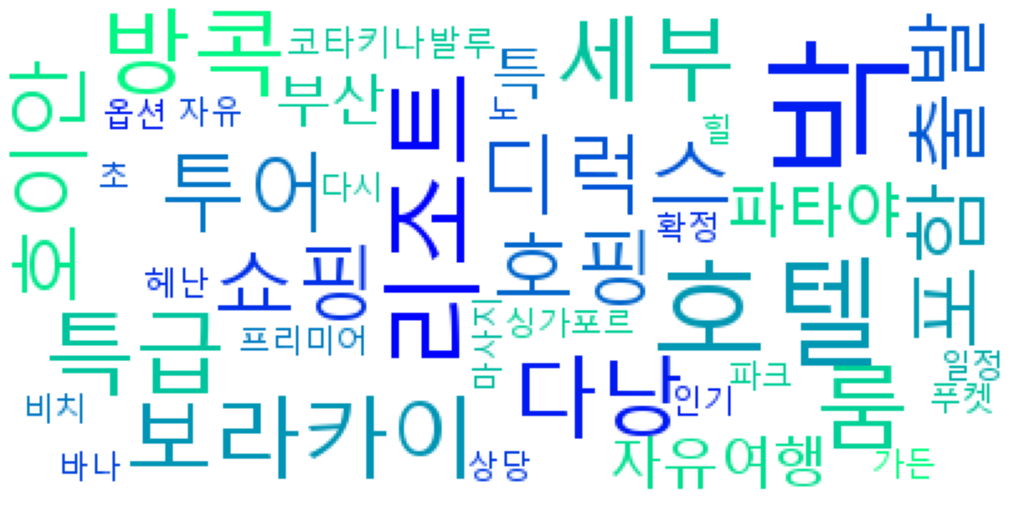

[('박', 139), ('호텔', 77), ('리조트', 55), ('룸', 47), ('방콕', 47), ('세부', 44), ('특급', 44), ('보라카이', 42), ('다낭', 41), ('포함', 39), ('투어', 38), ('디럭스', 38), ('호이안', 36), ('쇼핑', 35), ('호핑', 35), ('출발', 34), ('파타야', 30), ('자유여행', 30), ('부산', 29), ('특', 28), ('코타키나발루', 27), ('헤난', 25), ('확정', 24), ('비치', 24), ('노', 23), ('자유', 23), ('마사지', 22), ('프리미어', 22), ('바나', 21), ('가든', 21), ('싱가포르', 20), ('힐', 19), ('일정', 19), ('파크', 19), ('상당', 19), ('옵션', 18), ('다시', 18), ('인기', 17), ('초', 17), ('푸켓', 16)]


In [7]:
df = pd.read_csv("./Data/pkgtour_SEA.csv")
all_word_list = [] # 전체 단어를 담을 리스트
for j in range(len(df.index)):
    pkname = df['패키지명'][j] # 각 행의 패키지명에서
    words = okt.nouns(pkname) # 해당 요소에서 명사인 것만 추출해서 리스트로 만들고

    words = set(words) #
    words = list(words) # 중복되는 단어를 리스트에서 없애주고

    for word in words: #  리스트의 각 요소들을
        all_word_list.append(word) #전체 단어 리스트에 추가
counts = Counter(all_word_list)
tags = counts.most_common(40)

showWordCloud(tags)
print(tags)


---
### 동남아 여행 상품으로 가장 많은 지역은 방콕, 세부, 보라카이 순이다
##### (보라카이 ?)
---

###### 네이버 데이터랩 상반기 동남아 여행지 검색

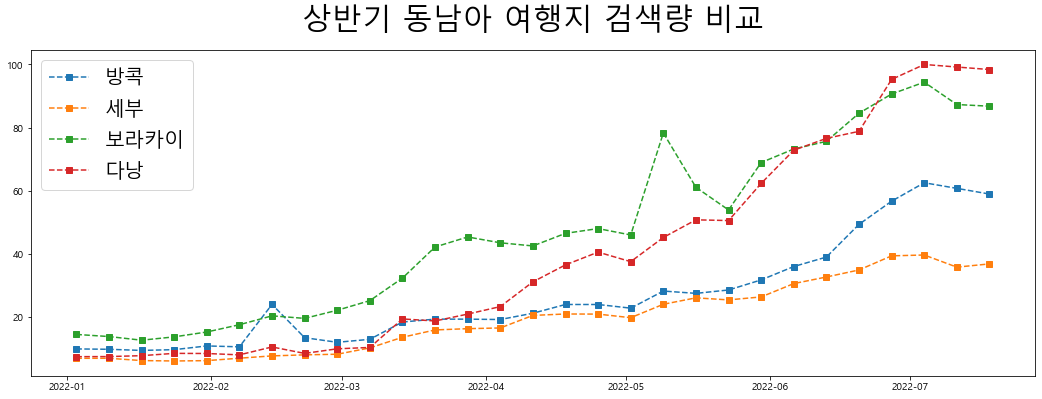

In [6]:
df_click = pd.read_csv('./Data/clickplace.csv', header=6)
df_click['날짜'] = df_click['날짜'].astype('datetime64')
df_click.set_index(df_click['날짜'], drop=True,inplace=True)
df_click.drop('날짜', axis= 1,inplace=True)
df_click

font_path = r'c:\Windows\Fonts\malgun.ttf'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

plt.figure(figsize=(18, 6))
plt.plot(df_click, label=df_click.columns,  linestyle = '--', marker = 's',)
plt.legend(loc='upper left', fontsize =20)
plt.title('상반기 동남아 여행지 검색량 비교', fontsize= 30, pad = 20)
plt.show()

##### 동남아 여행에 대한 관심이 꾸준히 증가
##### 패키지 여행 상품의 수의 비해 다낭에 대한 관심이 높고, 방콕과 세부에 대한 관심은 상대적으로 낮음

In [9]:
# 민수님 네이버 블로그 검색 함수
def   blog_search(keyword):
    blog_title_text=[]
    noun_list =[]
    counts =[]
    tag =[]
    
    for i in range(1,16):
        wd = webdriver.Chrome('C:/Users/hune1/OneDrive/바탕 화면/FILE/Study/chromedriver')
        main_url =f"https://section.blog.naver.com/Search/Post.naver?pageNo={i}&rangeType=ALL&orderBy=sim&keyword={keyword}" #

        wd.get(main_url)   
        
        html   =   wd.page_source
        soupData =   BeautifulSoup(html,   'html.parser')
        blog_title =   soupData.find_all('span',   {'class':'title'})
        
        for i in range(7):
            blog_title_text.append(blog_title[i].text)
        #print(blog_title_text)
        
        
        for data in blog_title_text:
            sentences_tag = okt.pos(data)
            # tag가 명사인 단어들만 noun_adj_list에 넣어준다.
            for word, tag in sentences_tag:
                if tag in ['Noun']:
                    if keyword in word:
                        continue
                    elif '여행' in word:
                        continue
                    else :
                        noun_list.append(word)
        wd.quit()
        
    counts   = Counter(noun_list)
    tags   = counts.most_common(40)
    showWordCloud(tags) # tags를 보내 wordcloud 로 보여주는 함수 실행
    plt.figure(figsize = (6, 6)) # 최종 워드 클라우드 사이즈 지정
    print(tags)

In [10]:
def checkTags(keyword): # keyword로 네이버 페키지 여행 사이트 크롤링 해주는 함수
    count_page = 0
    df = pd.read_csv('./Data/pkgtour_SEA.csv') # 주소가 저장된 csv 파일 읽어오고
    tag_list = [] # 전체 tag를 담을 리스트를 준비
    for u in range(len(df.index)): # 전체 csv 파일 행에서
        if keyword in df['패키지명'][u]: # keyword 가 그 행의 패키지명에 있으면
            count_page += 1
            url = df['패키지 주소'][u] # 해당 행의 패키지 주소를 받아온다
            html = requests.get(url) # 각 페이지의 html을 읽어오고
            soup = BeautifulSoup(html.text, 'html.parser') # BeautifulSoup를 활용해 html 데이터를 사용하기 쉽게 변형
            classtag = soup.find_all('a', {'class':'tag'}) # soup 데이터에서 <ul> 태그의 'list'에 해당하는 class를 저장
            for tag in range(len(classtag)): # classtag로 찾은 전체 tag 데이터를
                tag = classtag[tag].text # text로 가져오고
                tag = tag.replace('#', '') # 필요없는 # 태그를 제거하고
                if keyword in tag: # 해당 여행지 글자가 들어간 태그
                    continue
                elif '여행' in tag: # '여행'이라는 글자가 들어간 태그
                    continue # 는 무시하고
                else:
                    tag_list.append(tag) # 다른 태그들만 추가

    counts = Counter(tag_list) # 전체 tag_list에서 각 단어가 몇번씩 들어갔는지 count
    tags = counts.most_common(40)

    showWordCloud(tags) # tags를 보내 wordcloud 로 보여주는 함수 실행
    print(f'{count_page}개의 {keyword} 관련 패키지')
    print(tags)

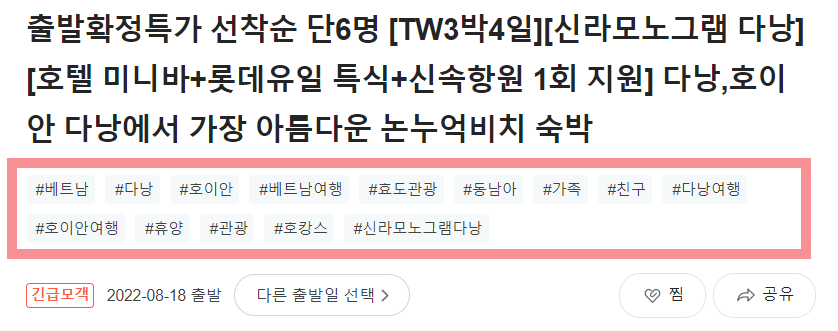

In [11]:
Image('./image/img_02.PNG') # 네이버 여행사 각 패키지별 세부 페이지

###### 각 패키지의 해시태그를 크롤링

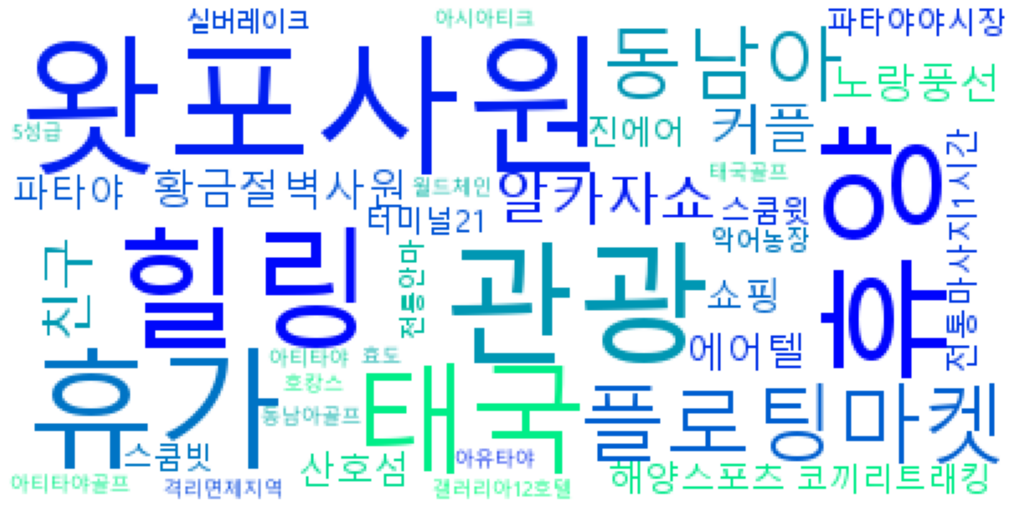

47개의 방콕 관련 패키지
[('왓포사원', 16), ('관광', 13), ('휴양', 13), ('힐링', 13), ('휴가', 13), ('태국', 12), ('플로팅마켓', 11), ('동남아', 10), ('알카자쇼', 9), ('친구', 8), ('커플', 8), ('황금절벽사원', 8), ('노랑풍선', 8), ('에어텔', 7), ('쇼핑', 6), ('파타야', 6), ('산호섬', 6), ('해양스포츠', 5), ('진에어', 4), ('코끼리트래킹', 4), ('전통마사지1시간', 4), ('파타야야시장', 4), ('스쿰윗', 4), ('스쿰빗', 4), ('터미널21', 4), ('실버레이크', 3), ('전통안마', 3), ('악어농장', 3), ('격리면제지역', 2), ('갤러리아12호텔', 2), ('아시아티크', 2), ('태국골프', 2), ('동남아골프', 2), ('아티타야', 2), ('아티타야골프', 2), ('아유타야', 2), ('효도', 2), ('월드체인', 2), ('5성급', 2), ('호캉스', 2)]


In [12]:
checkTags('방콕')

##### 왓포사원 등 관광 명소 상품이 주요 태그

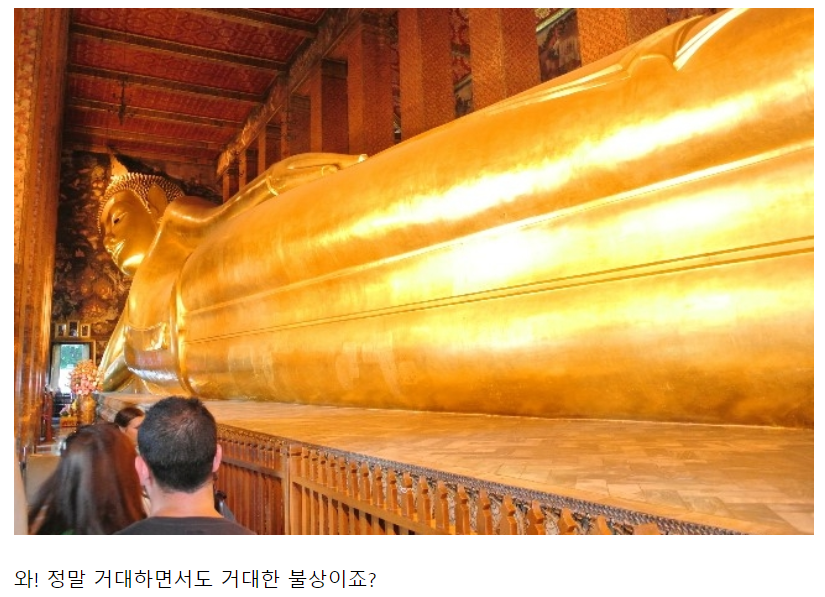

In [7]:
Image('./image/img_04.PNG') # 왓포사원 불상

##### 소비자들의 관심도 비슷할까?
###### 네이버 블로그 크롤링

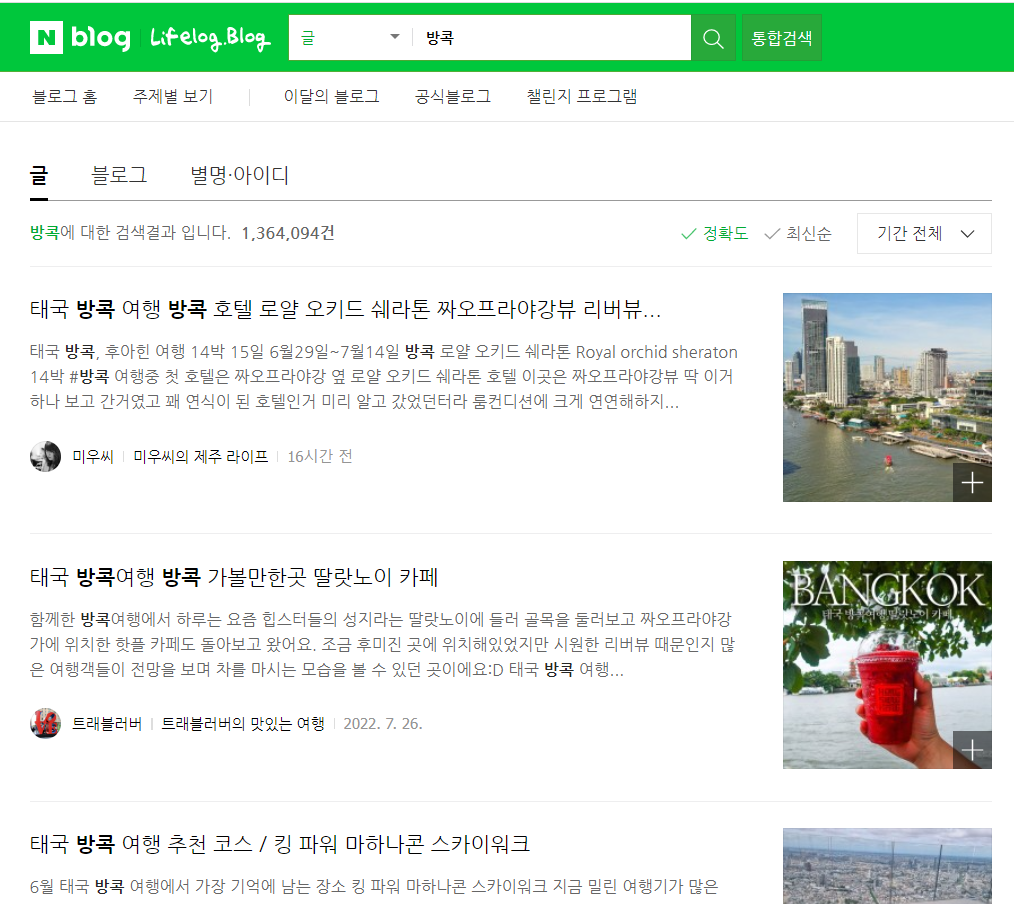

In [13]:
Image('./image/img_03.PNG') # 네이버 블로그 글 크롤링

C:\Users\hune1\AppData\Local\Temp\ipykernel_11520\1204324726.py:9: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  wd = webdriver.Chrome('C:/Users/hune1/OneDrive/바탕 화면/FILE/Study/chromedriver')


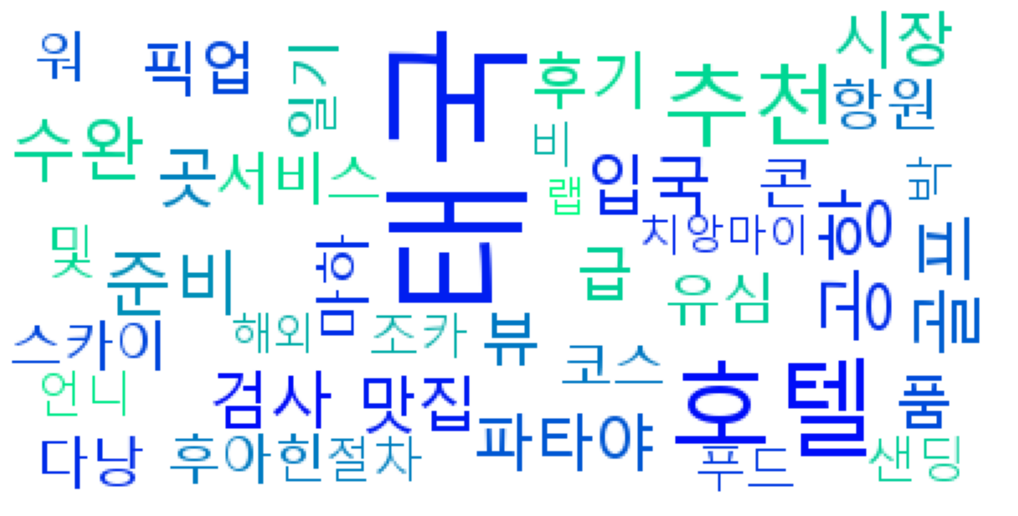

[('태국', 428), ('호텔', 173), ('추천', 119), ('공항', 97), ('골프', 79), ('준비', 76), ('수완', 69), ('곳', 66), ('입국', 64), ('검사', 61), ('맛집', 56), ('후기', 55), ('품', 54), ('급', 53), ('파타야', 53), ('시장', 51), ('뷰', 47), ('픽업', 46), ('서비스', 41), ('유심', 40), ('항원', 40), ('및', 40), ('마하', 39), ('콘', 39), ('다낭', 39), ('코스', 37), ('워', 36), ('스카이', 35), ('일기', 34), ('후아힌', 34), ('절차', 32), ('비', 31), ('박', 31), ('언니', 30), ('조카', 30), ('샌딩', 30), ('푸드', 29), ('치앙마이', 29), ('해외', 29), ('랩', 29)]


<Figure size 432x432 with 0 Axes>

In [14]:
blog_search('방콕')

##### 키워드 간 관계없음(관광지에 관심없음)
##### 패키지 상품이 블로그 이용자들과 관련이 없는가?

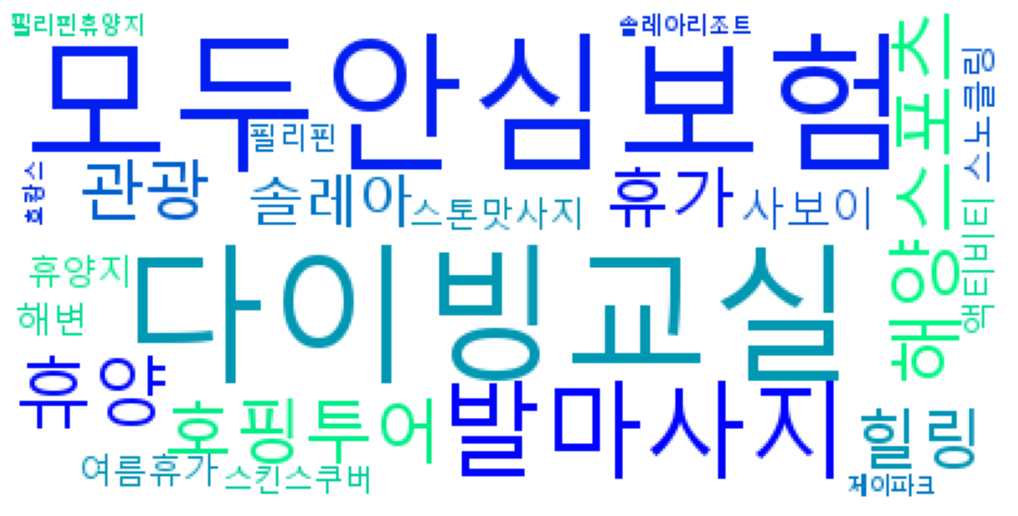

44개의 세부 관련 패키지
[('모두안심보험', 28), ('다이빙교실', 28), ('발마사지', 28), ('휴양', 14), ('해양스포츠', 13), ('호핑투어', 13), ('관광', 11), ('힐링', 11), ('휴가', 11), ('솔레아', 8), ('사보이', 5), ('휴양지', 3), ('여름휴가', 3), ('스톤맛사지', 3), ('스노클링', 3), ('해변', 3), ('액티비티', 3), ('스킨스쿠버', 2), ('필리핀', 2), ('필리핀휴양지', 1), ('호캉스', 1), ('솔레아리조트', 1), ('제이파크', 1)]


In [15]:
checkTags('세부') # 패키지 해시태그 검색

###### 모두안심보험은 하나투어 보험
### 주요 키워드 : 다이빙교실, 발마사지, 휴양, 해양스포츠

C:\Users\hune1\AppData\Local\Temp\ipykernel_11520\1204324726.py:9: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  wd = webdriver.Chrome('C:/Users/hune1/OneDrive/바탕 화면/FILE/Study/chromedriver')


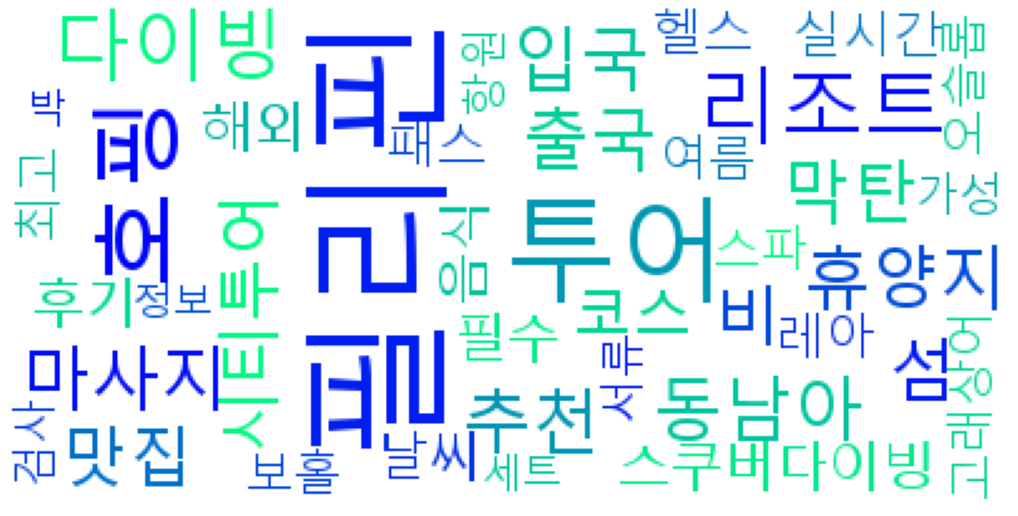

[('필리핀', 418), ('투어', 208), ('호핑', 141), ('리조트', 104), ('다이빙', 89), ('입국', 72), ('동남아', 70), ('추천', 70), ('마사지', 68), ('섬', 64), ('막탄', 63), ('휴양지', 62), ('출국', 61), ('맛집', 56), ('시티투어', 54), ('비', 52), ('코스', 45), ('스쿠버다이빙', 45), ('해외', 45), ('필수', 44), ('후기', 42), ('음식', 42), ('날씨', 42), ('레아', 39), ('실시간', 38), ('헬스', 37), ('패스', 37), ('최고', 34), ('여름', 34), ('보홀', 34), ('스파', 33), ('오슬롭', 32), ('고래상어', 32), ('가성', 30), ('항원', 29), ('검사', 29), ('서류', 29), ('세트', 28), ('박', 28), ('정보', 28)]


<Figure size 432x432 with 0 Axes>

In [17]:
blog_search('세부') # 블로그 검색

#### 투어, 호핑, 다이빙 등 채험형 관광과 마사지, 휴양지 등이 주요 키워드가 패키지와 비슷한 결과

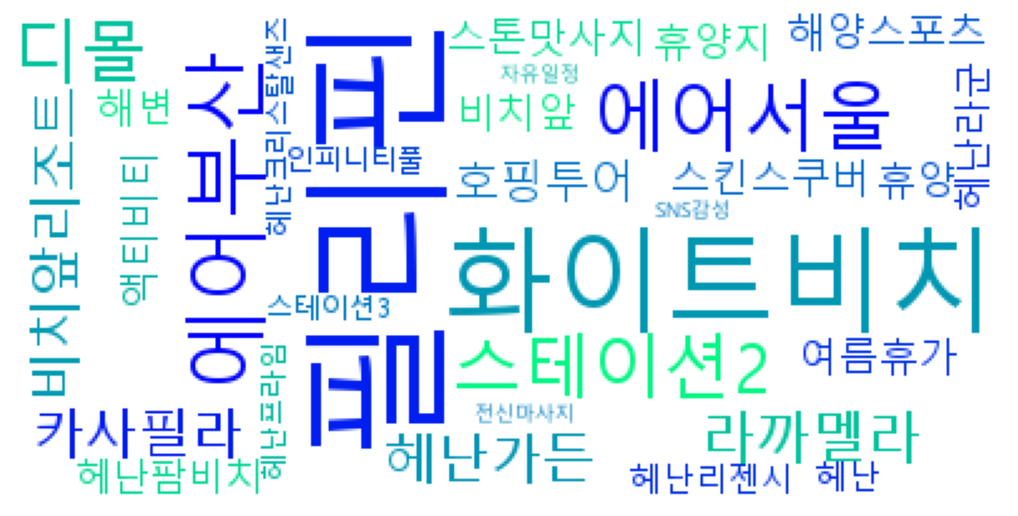

42개의 보라카이 관련 패키지
[('필리핀', 41), ('화이트비치', 37), ('에어부산', 21), ('에어서울', 16), ('스테이션2', 14), ('디몰', 13), ('라까멜라', 8), ('헤난가든', 7), ('카사필라', 7), ('비치앞리조트', 7), ('호핑투어', 5), ('휴양', 4), ('휴양지', 4), ('여름휴가', 4), ('스킨스쿠버', 4), ('해양스포츠', 4), ('스톤맛사지', 4), ('해변', 4), ('액티비티', 4), ('비치앞', 4), ('헤난팜비치', 4), ('헤난라군', 4), ('헤난리젠시', 3), ('헤난', 3), ('스테이션3', 2), ('헤난크리스탈샌즈', 2), ('인피니티풀', 2), ('헤난프라임', 2), ('SNS감성', 1), ('전신마사지', 1), ('자유일정', 1)]


In [18]:
checkTags('보라카이') # 패키지 해시태그 검색

### 주요 키워드 : 화이트비치(해변), 디몰(시장), 라까멜라(리조트)

C:\Users\hune1\AppData\Local\Temp\ipykernel_11520\1204324726.py:9: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  wd = webdriver.Chrome('C:/Users/hune1/OneDrive/바탕 화면/FILE/Study/chromedriver')


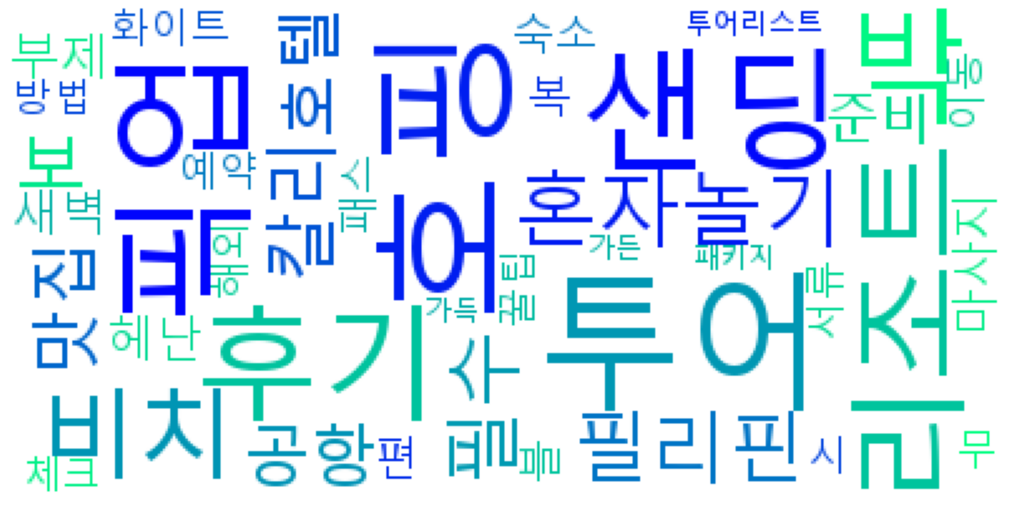

[('호핑', 132), ('투어', 125), ('픽업', 120), ('샌딩', 105), ('박', 91), ('후기', 90), ('리조트', 87), ('비치', 74), ('혼자놀기', 72), ('필수', 65), ('필리핀', 65), ('칼리', 58), ('보', 58), ('공항', 51), ('맛집', 51), ('호텔', 49), ('준비', 47), ('부제', 44), ('새벽', 39), ('마사지', 37), ('헤난', 37), ('블', 35), ('복', 35), ('편', 34), ('숙소', 32), ('화이트', 30), ('방법', 29), ('꿀팁', 29), ('예약', 28), ('시', 28), ('무', 28), ('이동', 27), ('서류', 27), ('패스', 27), ('해외', 26), ('체크', 26), ('투어리스트', 26), ('가득', 25), ('가든', 25), ('패키지', 24)]


<Figure size 432x432 with 0 Axes>

In [19]:
blog_search('보라카이') # 블로그 검색

#### 동남아시아 여행 트랜드 결론
---
##### 1) 동남아시아 여행 장소 트랜드는 여행사와 소비자 간의 차이를 보인다.
##### 2) 가장 많은 방콕 패키지의 키워드들이 소비자들의 관심사와 동떨어진 모습을 보인다.  
##### 3) 세부와 보라카이 여행 패키지의 경우 소비자들의 관심사와 일치하는 모습을 보인다.  
#### => 여행사는 소비자 니즈에 따른 패키지를 조절하고 특히 방콕에 대한 홍보 키워드를 최신 트랜드에 맞춰 수정할 필요가 있다.

###### 자료 출처
###### https://pkgtour.naver.com/list?destination=ASIA_10007&departureDate=2022.07.29.%2C2022.08.29.&bookStatusCodes=LEVDC&adultCnt=1&page={page}
###### https://section.blog.naver.com/Search/Post.naver?pageNo=3&rangeType=ALL&orderBy=sim&keyword=%EC%84%B8%EB%B6%80
###### https://datalab.naver.com/